<a href="https://colab.research.google.com/github/edmondjonathan02/TSF-GRIP_DS-BA/blob/main/Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **THE SPARKS FOUNDATION - GRIP**
# ***DATA SCIENCE & BUSINESS DATA ANAYTICS***
**Author - Edmond Jonathan Jeremiah**<br>
**Task 1 - Prediction using Supervised ML**<br>
Problem Statement: To predict the percentage of a student based on the number of study hours.


# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Analysing the Data <br>
Reading the giving data set and viewing the data points


In [3]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


1. Checking the shape of the given dataset

In [6]:
print(df.shape)

(25, 2)


2. Checking for null values

In [7]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

3. Viewing the column headings of the csv

In [8]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

4. Information about the datset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


5. Description of the Data

In [11]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Visualisation - Part 1
Plotting 'Hours Studied vs Percentage'

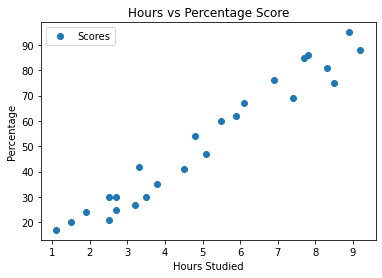

In [12]:
df.plot(x ='Hours', y ='Scores',style = 'o')
plt.title('Hours vs Percentage Score')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage')  
plt.show()

As we observe, there is a linear relationship between 'Hours studied' and 'Percantage'. Hence, we will use **Linear Regression using Supervied ML** to predict the further values 

# Processing the Data
Allocating the data into arrays so we can split it into 'train' and 'test'

In [14]:
x = df.iloc[: , :1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [15]:
y = df.iloc[: , 1:].values
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]])

Splitting the data

In [16]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 0)

In [17]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)
print('TRAINING COMPLETED')

TRAINING COMPLETED


Plotting a Best Fit Line (Regressor)

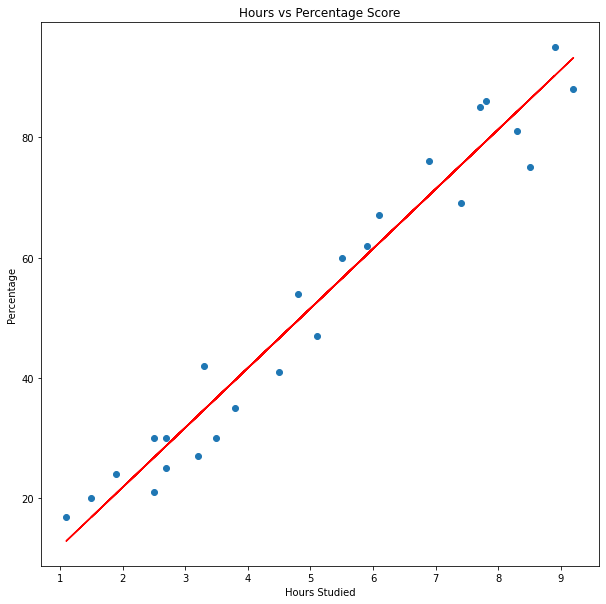

In [22]:
plt.figure(figsize=(10,10))
line = model.coef_*x + model.intercept_
plt.scatter(x, y)
plt.title('Hours vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.plot(x, line , label = 'BEST FIT LINE' , color = 'r')
plt.show()

# Prediction of Values
Predicting the values using the model and finding its accuracy

In [23]:
y_pred = model.predict(x_test)

Accuracy

In [24]:
print('ACCURACY:', model.score(x_test , y_test)*100) #multiplied by hundred to find the % value


ACCURACY: 94.54906892105353


# Comparison of Actual and Predicted Values

Actual Values

In [25]:
actual = print('Actual Values:' , y_test)

Actual Values: [[20]
 [27]
 [69]
 [30]
 [62]]


Predicted Values

In [26]:
predicted = print('Predicted :',y_pred)

Predicted : [[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


Training and Test Score from the analysis

In [28]:
print("Training Score:", model.score(x_train,y_train)*100)
print("Test Score: ", model.score(x_test,y_test)*100)

Training Score: 95.15510725211553
Test Score:  94.54906892105353


# Data Visualisation - Part 2
Plot of 'Hours Studied' and 'Percentage' on the **TRAIN DATA**

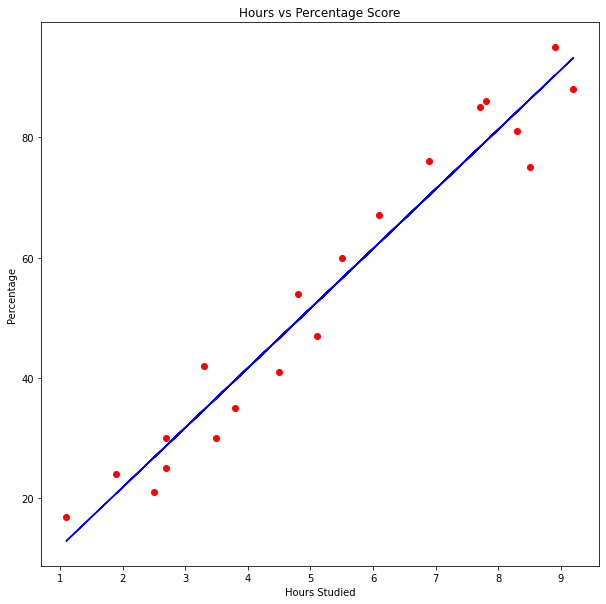

In [29]:
plt.figure(figsize=(10,10))
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,model.predict(x_train),color='blue')
plt.title('Hours vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.show()

Plot of 'Hours Studied' and 'Percentage' on the **TEST DATA**

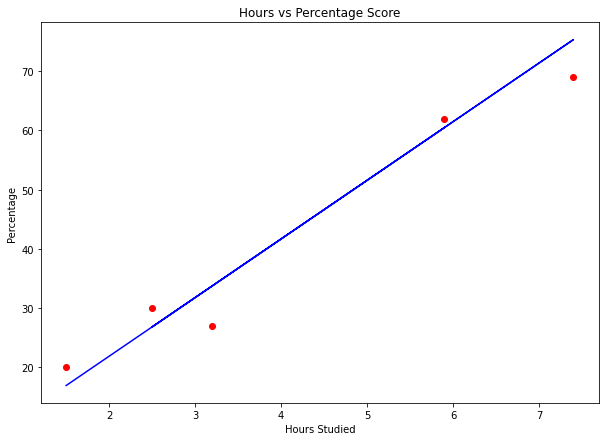

In [30]:
plt.figure(figsize=(10,7))
plt.scatter(x_test,y_test,color='red');
plt.plot(x_test,y_pred,color='blue')
plt.title('Hours vs Percentage Score')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage')
plt.show()

# Final prediction of score if a student studies for 9.25 hours

In [31]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = model.predict([[hours]])
print("Number of Hours = {}".format(hours))
print()
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25

Predicted Score = [93.69173249]


#Evaluation using Mean Absolute Error

In [33]:
from sklearn import metrics
print('Mean Absolute Error :' , metrics.mean_absolute_error(y_test , y_pred))

Mean Absolute Error : 4.183859899002982


#**Conclusion: If a student studies for 9.25 hours, their percentage score will be: 93.69%**

**THANK YOU :)**


